<font size=5><font color='yellow'>YOLOv3 Object detection

# <font size=4>1. Making sure if you're connected to GPU

In [1]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 15023588203860214450, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 14509932544
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 9964274982344144196
 physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"]

In [2]:
#to check the type of GPU
!nvidia-smi

Sun Jun 13 18:50:59 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.27       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P0    28W /  70W |    222MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

#<font size=4> 2. Clonning to Darknet 

In [3]:
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 15097, done.
remote: Counting objects: 100% (25/25), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 15097 (delta 8), reused 9 (delta 2), pack-reused 15072
Receiving objects: 100% (15097/15097), 13.45 MiB | 23.23 MiB/s, done.
Resolving deltas: 100% (10252/10252), done.


In [4]:
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile #enable OPENCV
!sed -i 's/GPU=0/GPU=1/' Makefile  #enable GPU
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile

/content/darknet


In [5]:
!/usr/local/cuda/bin/nvcc --version #CUDA version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Wed_Jul_22_19:09:09_PDT_2020
Cuda compilation tools, release 11.0, V11.0.221
Build cuda_11.0_bu.TC445_37.28845127_0


# <font size=4>3. Building darknet 

In [6]:
!make

mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:935:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1136:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iteration_old == 0)
             ^~
./src/image_

# <font size=4>4. Downloading weights


In [7]:
# YOLOv3 has been pretrained on COCO dataset
# Getting weights

!wget https://pjreddie.com/media/files/yolov3.weights

--2021-06-13 18:52:41--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  45.5MB/s    in 5.5s    

2021-06-13 18:52:47 (42.7 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]



In [8]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
from google.colab import files
from google.colab.patches import cv2_imshow

In [9]:
#function to show images
def imShow(path):
  image = cv2.imread(path)
  h, w = image.shape[:2]
  resized_image = cv2.resize(image,(3*w, 3*h), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

# to upload 
def upload():
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)

# to download  
def download(path):
  files.download(path)

# <font size=4>5. Running darknet 

Follow the command: 
./darknet detect path_to_config path_to_weights path_to_imgs ... 
Darknet has few images in darknet/data, to run on default images write these path instead of the image path shown as follow: data/person.jpg or data/dog.jpg

In [10]:
# run darknet detection
!./darknet detect cfg/yolov3.cfg yolov3.weights '/content/boris-dunand-rCVxejd-Uq0-unsplash.jpg'

 CUDA-version: 11000 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  

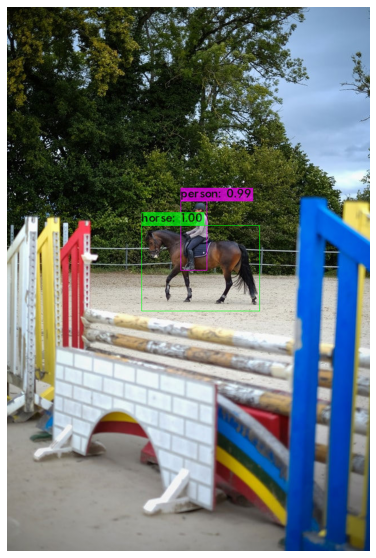

In [11]:
# show image 
imShow('predictions.jpg')

 CUDA-version: 11000 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  

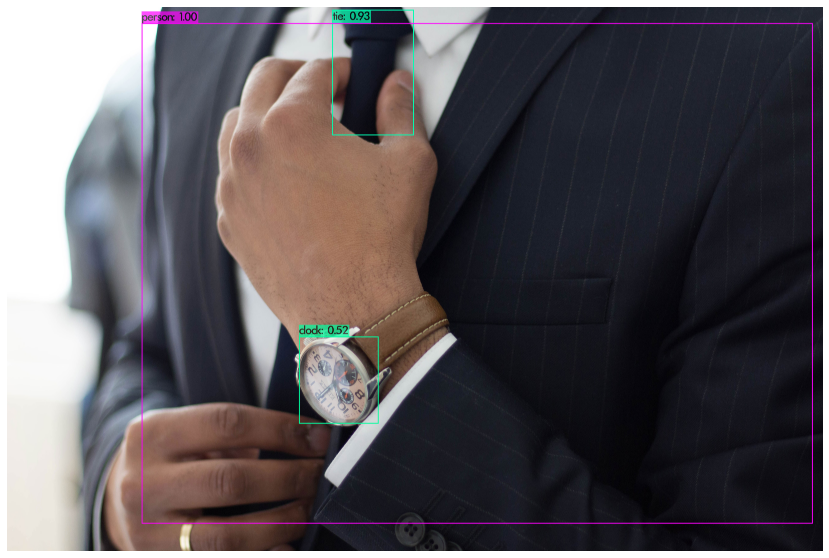

In [12]:
!./darknet detect cfg/yolov3.cfg yolov3.weights '/content/ruthson-zimmerman-Ws4wd-vJ9M0-unsplash.jpg'
imShow('predictions.jpg')

In [ ]:
# This stops 'Run all' at this cell by causing an error
assert False

Running on .jpg locally

In [13]:
# upload an image to root dir
%cd ..
upload()

/content


Saving razvan-chisu-Ua-agENjmI4-unsplash.jpg to razvan-chisu-Ua-agENjmI4-unsplash.jpg
saved file razvan-chisu-Ua-agENjmI4-unsplash.jpg


/content/darknet
 CUDA-version: 11000 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Sho

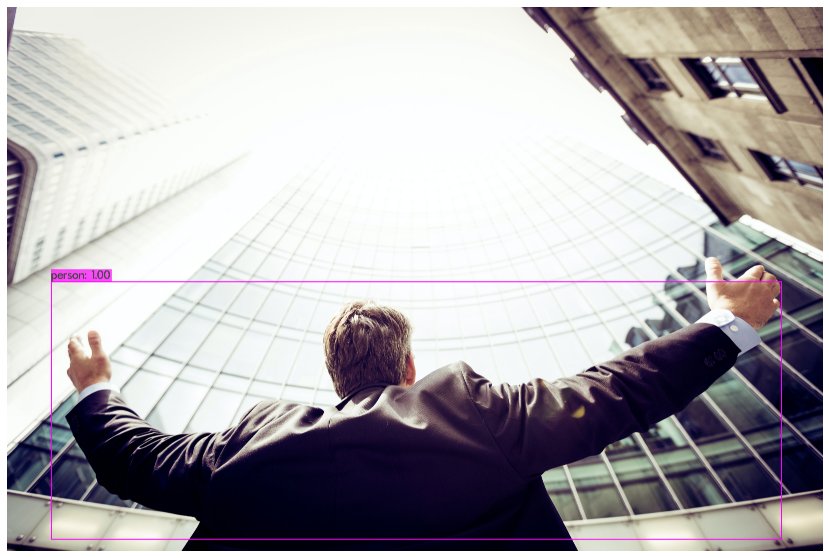

In [14]:
# make sure you are in the darknet folder to run the detections command!
%cd darknet
!./darknet detect cfg/yolov3.cfg yolov3.weights /content/razvan-chisu-Ua-agENjmI4-unsplash.jpg
imShow('predictions.jpg')

Running detection on image from Google drive

In [15]:
%cd ..
from google.colab import drive
drive.mount('/content/gdrive')

/content
Mounted at /content/gdrive


In [16]:
# this creates a symbolic link so that now the path /content/gdrive/My\ Drive/ is equal to /mydrive
!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

 APKs
'B19EE084(5).pdf'
'Calculus and Analytic Geometry.pdf'
'Certificate from Institute for new student 1920.pdf'
'Chem assignment'
'Colab Notebooks'
'Comp assignment.gdoc'
'Cs assignment.docx'
'Cs assignmentk.docx'
'Democracy in India.gdoc'
 DriveFire
'EM(statics).pdf'
 Essay.gdoc
 Gallery_video
'Getting started.pdf'
 IMG_20191031_001847.jpg
 IMG_20200208_155421.jpg
 IMG_20200208_155434.jpg
 IMG_20200208_155440.jpg
 IMG_20200208_155454.jpg
 IMG_20200208_155500.jpg
 IMG_20200208_155511.jpg
 IMG_20200208_155529.jpg
 IMG_20200208_155537.jpg
 IMG_20200208_155634.jpg
 IMG_20200208_155644.jpg
 MI_Audio
 MI_cam_photos
 pdf_all
'Renewal Certificate form Institute- English 2018-19 (1).gdoc'
'Renewal Certificate form Institute- English 2018-19.gdoc'
'Renewal Certificate form Institute- English 2018-19.pdf'
'Sport committee'
 textbookmaths.pdf
'Untitled document.gdoc'
'Untitled folder'


/content/darknet
 CUDA-version: 11000 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Sho

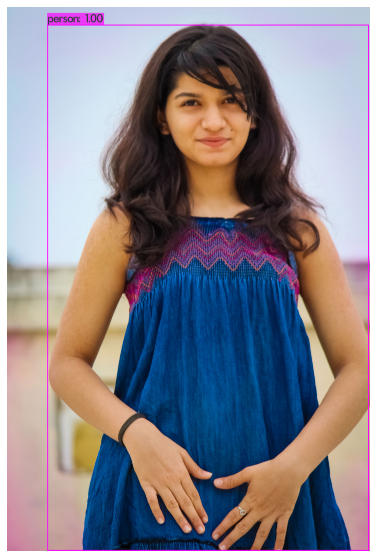

In [17]:
# (/images/plane.jpg)
%cd darknet
!./darknet detect cfg/yolov3.cfg yolov3.weights /content/gdrive/MyDrive/MI_cam_photos/20200613174207_IMG_0053-1.jpg
imShow('predictions.jpg')

Downloading locally and in drive respectively

In [ ]:
# first run then run it again
download('predictions.jpg') 

In [ ]:
!cp predictions.jpg /mydrive/images/detection1.jpg 

<font size=5>Thank you :)